In [1]:
import pandas as pd
from ranking_ut import *
data = pd.read_csv('Studencka_up_146.csv')
data_dict = data.to_dict('list')
keys = list(data_dict.keys())
animals_dict = return_animals_dict()



Methods ranking wiek <19
[96, 68, 118] [34.04255319148936, 24.113475177304963, 41.843971631205676]
Porównywane odpowiedzi: <19 i 27 - 45
Kendall Tau:  1.0  
Pearson-r:  0.8880043882191575  
Ranking dla odpowiedzi <19: 
{'ACE': 96, 'RISE': 68, 'Protopnet': 118}
Ranking dla odpowiedzi 27 - 45: 
{'ACE': 132, 'RISE': 124, 'Protopnet': 188}
Porównywane odpowiedzi: <19 i >65
Kendall Tau:  0.816496580927726  
Pearson-r:  0.8293962196513647  
Ranking dla odpowiedzi <19: 
{'ACE': 96, 'RISE': 68, 'Protopnet': 118}
Ranking dla odpowiedzi >65: 
{'ACE': 19, 'RISE': 19, 'Protopnet': 34}
Methods ranking wiek 19 - 26
[383, 322, 528] [31.062449310624494, 26.11516626115166, 42.82238442822384]
Porównywane odpowiedzi: 19 - 26 i >65
Kendall Tau:  0.816496580927726  
Pearson-r:  0.9575592465413186  
Ranking dla odpowiedzi 19 - 26: 
{'ACE': 383, 'RISE': 322, 'Protopnet': 528}
Ranking dla odpowiedzi >65: 
{'ACE': 19, 'RISE': 19, 'Protopnet': 34}
Methods ranking wiek 27 - 45
[132, 124, 188] [29.72972972972973,

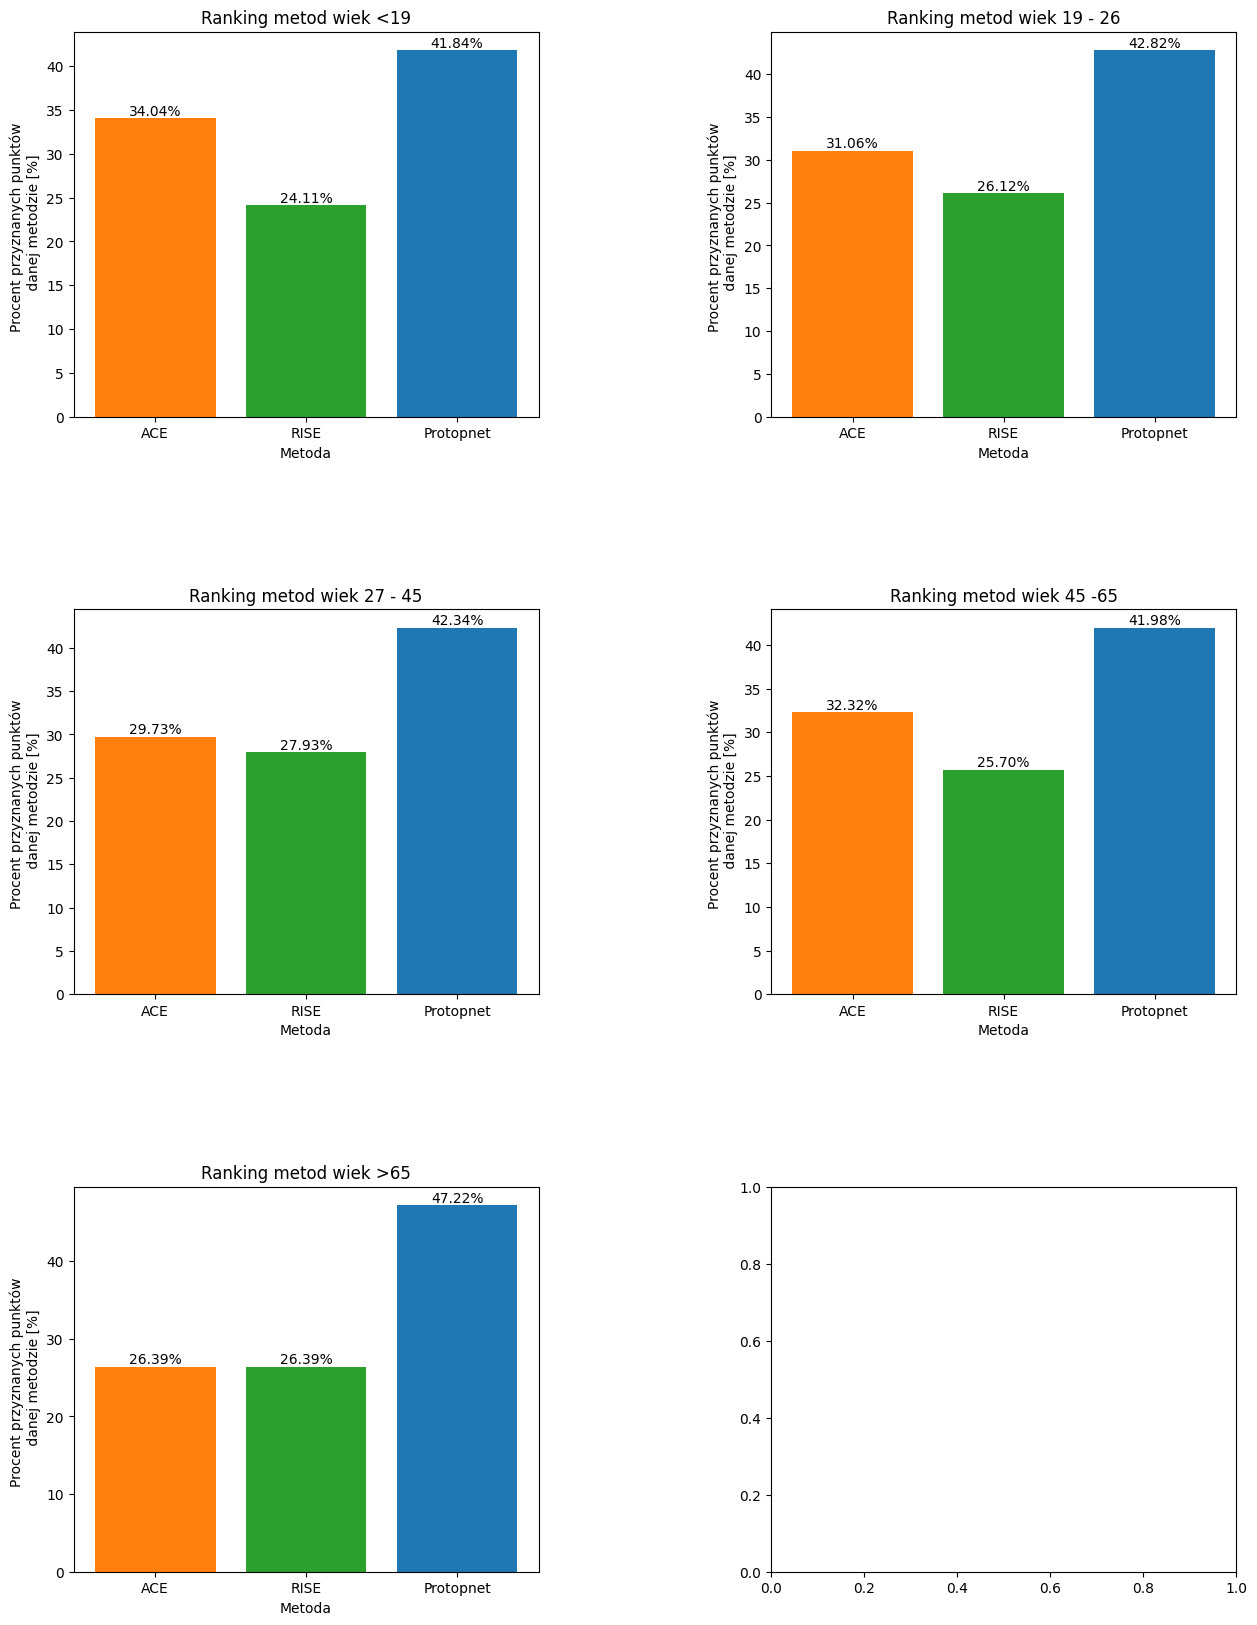

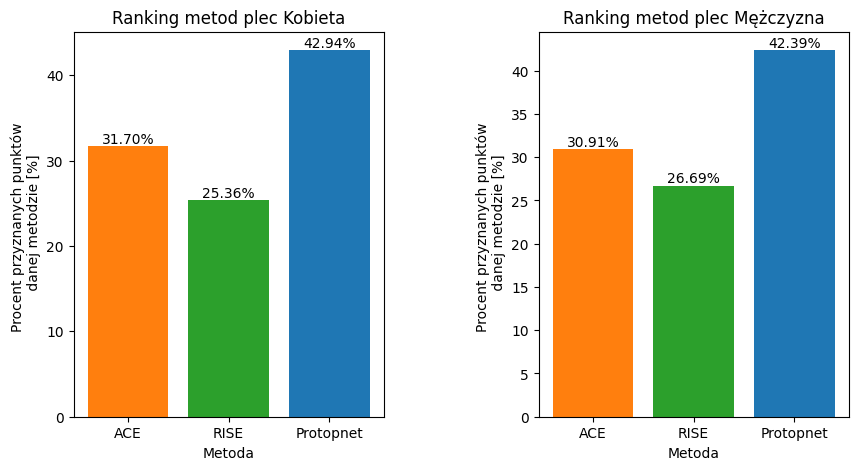

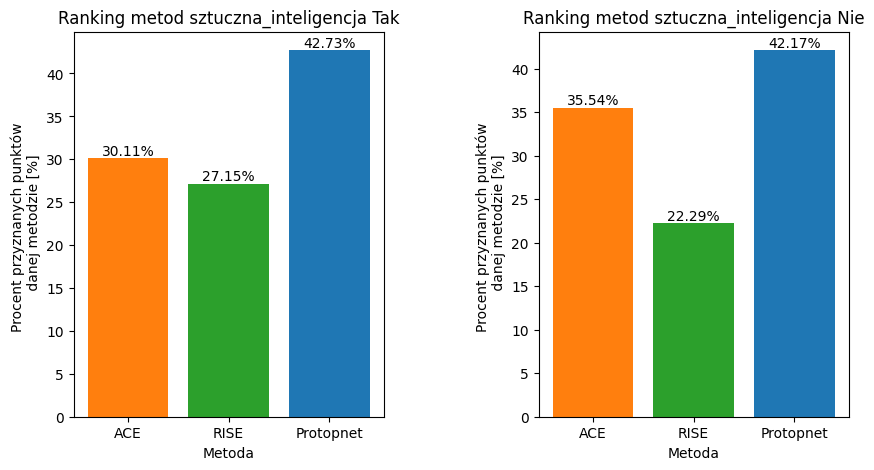

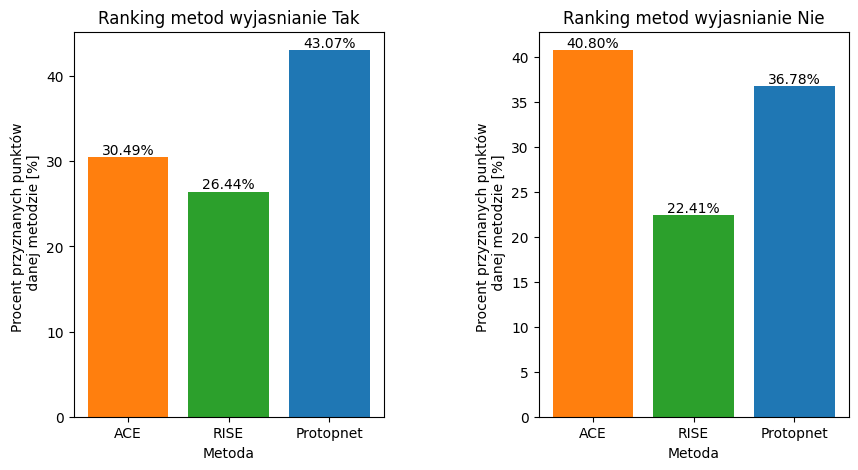

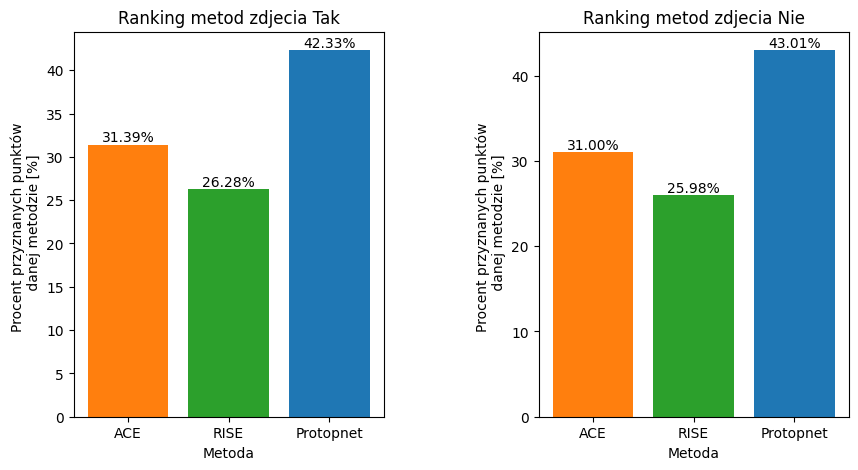

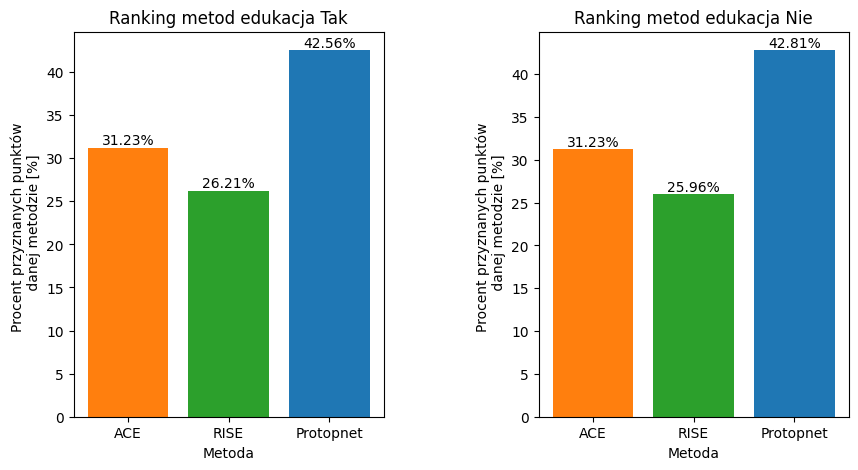

In [2]:
# make diagram for ACE RISE and Protopnet
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

respondents = {}
for cecha in std_cechy:
    if cecha == "wiek":
        fig, axs = plt.subplots( len(std_warunki[cecha])//2+1,2, figsize=(15, 20), facecolor='w', edgecolor='k')
    else:
        fig, axs = plt.subplots( len(std_warunki[cecha])//2,2, figsize=(10, 5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.5)
    axs = axs.ravel()
    for j,warunek in enumerate(std_warunki[cecha]):
        metric_ranking = count_metric_ranking(data, animals_dict, cecha,warunek)
        methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
        for key, value in metric_ranking.items():
                for method, count in value.items():
                    methods_ranking[method] += count

        ranking_value = list(methods_ranking.values())
        percent_ranking_value = [ rv / sum(ranking_value)*100 for rv in ranking_value]
        
        axs[j].bar(range(len(methods_ranking)), percent_ranking_value, align='center',  color=['tab:orange', 'tab:green', 'tab:blue'])
        
        axs[j].bar_label(axs[j].containers[0], labels=[f'{v:.2f}%' for v in percent_ranking_value], fmt='%.2f')
        axs[j].set_xticks(range(len(methods_ranking)), list(methods_ranking.keys()))
        axs[j].set_title("Ranking metod "+cecha +" "+warunek)
        axs[j].set_ylabel('Procent przyznanych punktów \n danej metodzie [%]')
        axs[j].set_xlabel('Metoda')
        print("Methods ranking "+cecha+" "+warunek)
        print(ranking_value, percent_ranking_value)
        for contr_warunek in std_warunki[cecha]:
            
            contr_metric_ranking = count_metric_ranking(data, animals_dict, cecha,contr_warunek)
            contr_methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
            for key, value in contr_metric_ranking.items():
                for method, count in value.items():
                    contr_methods_ranking[method] += count

            kendall = scipy.stats.kendalltau(list(methods_ranking.values()), list(contr_methods_ranking.values())).statistic
            pearsonr = scipy.stats.pearsonr(list(methods_ranking.values()), list(contr_methods_ranking.values())).statistic
        
            if (kendall != 1.0 or pearsonr <0.95) and str(kendall) != "nan":
                print("Porównywane odpowiedzi: " + warunek + " i " + contr_warunek)
                print("Kendall Tau: ", kendall, " ")
                #
                print("Pearson-r: ", pearsonr, " ")
                print("Ranking dla odpowiedzi "+ warunek +": ")
                print(methods_ranking)
                print("Ranking dla odpowiedzi "+ contr_warunek +": ")
                print(contr_methods_ranking)
                
               

    

{'krokodyl': {'ACE': 6, 'RISE': 7, 'Protopnet': 11}, 'slon': {'ACE': 10, 'RISE': 13, 'Protopnet': 6}, 'orzel': {'ACE': 14, 'RISE': 2, 'Protopnet': 14}, 'bizon': {'ACE': 20, 'RISE': 0, 'Protopnet': 4}, 'panda': {'ACE': 13, 'RISE': 3, 'Protopnet': 14}, 'hipopotam': {'ACE': 6, 'RISE': 8, 'Protopnet': 11}, 'lew': {'ACE': 10, 'RISE': 12, 'Protopnet': 8}, 'tygrys': {'ACE': 6, 'RISE': 10, 'Protopnet': 14}, 'zebra': {'ACE': 5, 'RISE': 5, 'Protopnet': 20}, 'zaba': {'ACE': 6, 'RISE': 8, 'Protopnet': 16}}
{'krokodyl': {'ACE': 23, 'RISE': 24, 'Protopnet': 53}, 'slon': {'ACE': 53, 'RISE': 54, 'Protopnet': 28}, 'orzel': {'ACE': 61, 'RISE': 15, 'Protopnet': 58}, 'bizon': {'ACE': 71, 'RISE': 1, 'Protopnet': 36}, 'panda': {'ACE': 45, 'RISE': 22, 'Protopnet': 67}, 'hipopotam': {'ACE': 24, 'RISE': 35, 'Protopnet': 43}, 'lew': {'ACE': 33, 'RISE': 71, 'Protopnet': 28}, 'tygrys': {'ACE': 19, 'RISE': 45, 'Protopnet': 69}, 'zebra': {'ACE': 40, 'RISE': 9, 'Protopnet': 87}, 'zaba': {'ACE': 14, 'RISE': 46, 'Prot

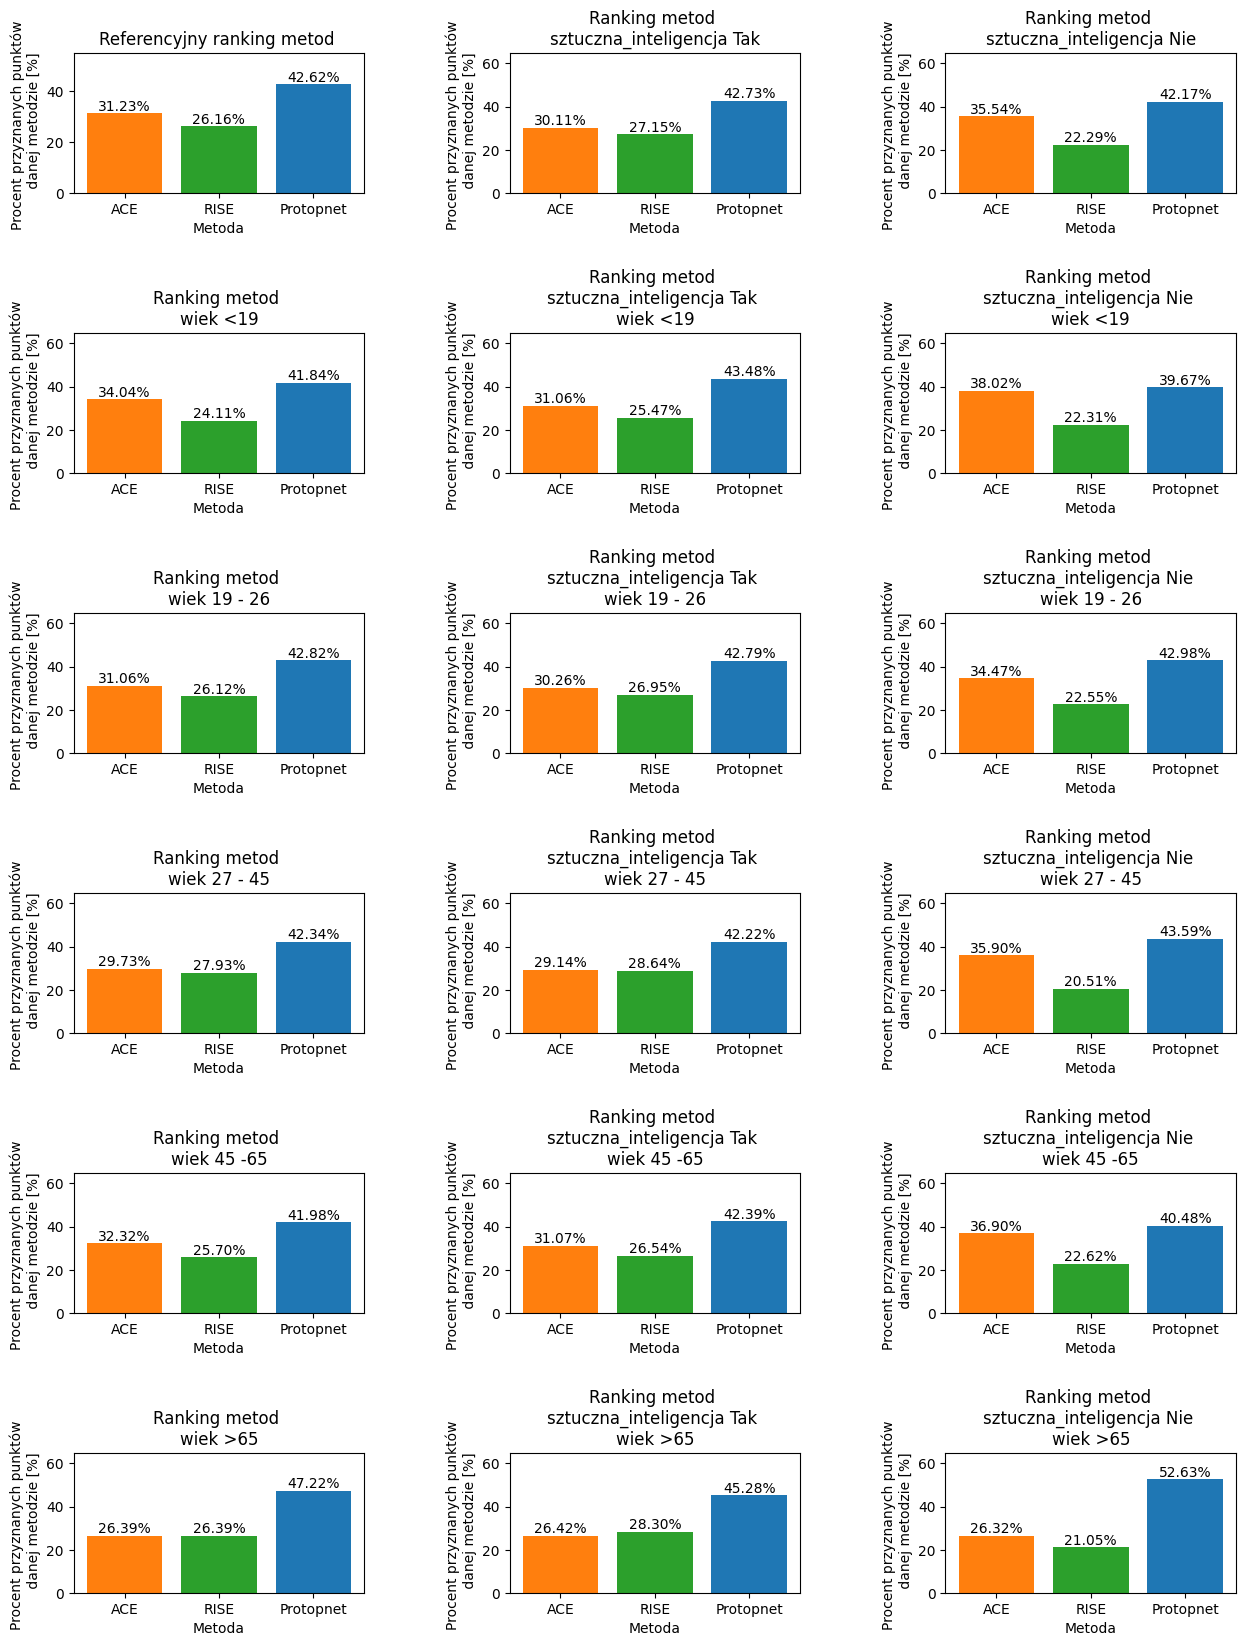

In [4]:
# muszę zrobić subplot wykresów 3 na 3
# 0,0 wykres ogólny dla wszystkich
# 0,1 wykres wyjaśnienia na tak
# 0,2 wykres wyjaśnienia na nie
# 1,0 wykres sztuczna inteligencja na tak
# 2,0 wykres sztuczna inteligencja na nie
# 1,1 wykres wyjaśnienia na tak, sztuczna inteligencja na tak
# 1,2 wykres wyjaśnienia na nie, sztuczna inteligencja na tak
# 2,1 wykres wyjaśnienia na tak, sztuczna inteligencja na nie
# 2,2 wykres wyjaśnienia na nie, sztuczna inteligencja na nie

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

def make_plot_ranking(ranking, j, cecha, warunek,cecha2, warunek2):
    
    ranking_value = list(ranking.values())
    percent_ranking_value = [ rv / sum(ranking_value)*100 for rv in ranking_value]

    axs[j].bar(range(len(ranking)), percent_ranking_value, align='center',  color=['tab:orange', 'tab:green', 'tab:blue'])
    axs[j].bar_label(axs[j].containers[0], labels=[f'{v:.2f}%' for v in percent_ranking_value], fmt='%.2f')
    axs[j].set_xticks(range(len(methods_ranking)), list(methods_ranking.keys()))
    axs[j].set_ylabel('Procent przyznanych punktów \n danej metodzie [%]')
    if cecha2 == None:
        axs[j].set_title("Ranking metod \n"+ cecha +" "+warunek)
    else:
        axs[j].set_title("Ranking metod \n"+ cecha +" "+warunek+" \n"+cecha2+" "+warunek2)
    axs[j].set_xlabel('Metoda')
    axs[j].set_ylim([0,65])
    
def ranking_ref():
    
    metric_ranking = ref_metric_ranking(data, animals_dict)
    methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
    for key, value in metric_ranking.items():
        for method, count in value.items():
            methods_ranking[method] += count

            #plot bar high for ech method
    ranking_value = list(methods_ranking.values())
    percent_ranking_value = [ rv / sum(ranking_value)*100 for rv in ranking_value]

    axs[0].bar(range(len(percent_ranking_value)), percent_ranking_value, align='center',  color=['tab:orange', 'tab:green', 'tab:blue'])
    axs[0].bar_label(axs[0].containers[0], labels=[f'{v:.2f}%' for v in percent_ranking_value], fmt='%.2f')
    axs[0].set_xticks(range(len(methods_ranking)), list(methods_ranking.keys()))
    axs[0].set_title("Referencyjny ranking metod ")
    axs[0].set_ylabel('Procent przyznanych punktów \n danej metodzie [%]')
    axs[0].set_xlabel('Metoda')
    axs[0].set_ylim([0,55])


cechy = ["sztuczna_inteligencja", "wiek"]
warunki = ["Tak", "Nie"]
warunki_2 = ["<19", "19 - 26", "27 - 45", "45 -65",">65"]


fig, axs = plt.subplots( 6,3, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.5)
axs = axs.ravel()    
ranking_ref()
grr = [1,2]
j=0

for warunek in warunki:
    metric_ranking = count_metric_ranking(data, animals_dict, cechy[0], warunek)
    methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
    for key, value in metric_ranking.items():
            for method, count in value.items():
                methods_ranking[method] += count
    make_plot_ranking(methods_ranking, grr[j], cechy[0], warunek, None, None)
    
    j = j+1
# j=0
# grr = [4,5,7,8]

grr = [3,6,9,12,15,18]
j=0 

for warunek in warunki_2:
    metric_ranking = count_metric_ranking(data, animals_dict, cechy[1], warunek)
    print(metric_ranking)
    methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
    for key, value in metric_ranking.items():
            for method, count in value.items():
                methods_ranking[method] += count
    
    make_plot_ranking(methods_ranking, grr[j], cechy[1], warunek, None, None)
    
    j = j+1

grr = [4,7,10,13,16,5,8,11,14,17]
j=0     
for w in warunki:
    for w2 in warunki_2:        
        metric_ranking = count_metric_ranking_two(data, animals_dict, cechy[0], w, cechy[1],w2)
        methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
        for key, value in metric_ranking.items():
                for method, count in value.items():
                    methods_ranking[method] += count
        make_plot_ranking(methods_ranking, grr[j], cechy[0], w, cechy[1], w2)
    
        j = j+1





    

plt.show()




{'krokodyl': {'ACE': 41, 'RISE': 44, 'Protopnet': 79}, 'slon': {'ACE': 83, 'RISE': 93, 'Protopnet': 39}, 'orzel': {'ACE': 87, 'RISE': 27, 'Protopnet': 93}, 'bizon': {'ACE': 117, 'RISE': 1, 'Protopnet': 53}, 'panda': {'ACE': 66, 'RISE': 35, 'Protopnet': 106}, 'hipopotam': {'ACE': 38, 'RISE': 54, 'Protopnet': 73}, 'lew': {'ACE': 49, 'RISE': 114, 'Protopnet': 40}, 'tygrys': {'ACE': 20, 'RISE': 72, 'Protopnet': 112}, 'zebra': {'ACE': 53, 'RISE': 18, 'Protopnet': 141}, 'zaba': {'ACE': 26, 'RISE': 65, 'Protopnet': 87}}
{'krokodyl': {'ACE': 12, 'RISE': 11, 'Protopnet': 19}, 'slon': {'ACE': 23, 'RISE': 19, 'Protopnet': 14}, 'orzel': {'ACE': 23, 'RISE': 5, 'Protopnet': 26}, 'bizon': {'ACE': 34, 'RISE': 0, 'Protopnet': 9}, 'panda': {'ACE': 22, 'RISE': 6, 'Protopnet': 27}, 'hipopotam': {'ACE': 12, 'RISE': 12, 'Protopnet': 15}, 'lew': {'ACE': 16, 'RISE': 24, 'Protopnet': 12}, 'tygrys': {'ACE': 9, 'RISE': 16, 'Protopnet': 27}, 'zebra': {'ACE': 14, 'RISE': 3, 'Protopnet': 36}, 'zaba': {'ACE': 12, 'R

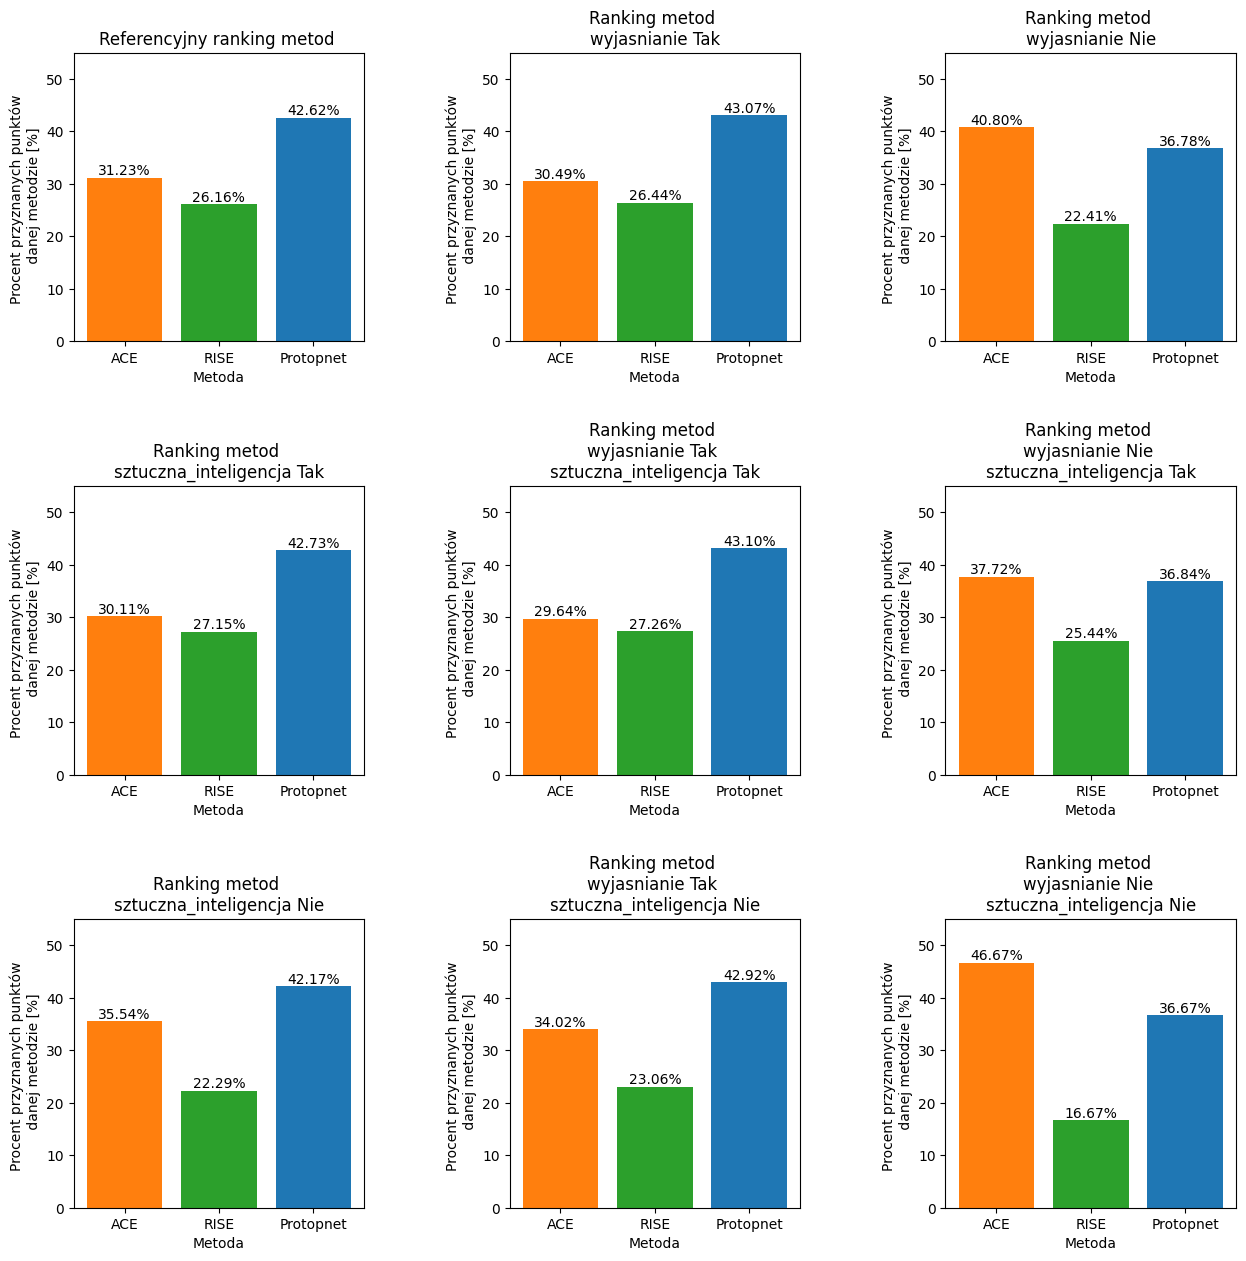

In [ ]:
# muszę zrobić subplot wykresów 3 na 3
# 0,0 wykres ogólny dla wszystkich
# 0,1 wykres wyjaśnienia na tak
# 0,2 wykres wyjaśnienia na nie
# 1,0 wykres sztuczna inteligencja na tak
# 2,0 wykres sztuczna inteligencja na nie
# 1,1 wykres wyjaśnienia na tak, sztuczna inteligencja na tak
# 1,2 wykres wyjaśnienia na nie, sztuczna inteligencja na tak
# 2,1 wykres wyjaśnienia na tak, sztuczna inteligencja na nie
# 2,2 wykres wyjaśnienia na nie, sztuczna inteligencja na nie

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

def make_plot_ranking(ranking, j, cecha, warunek,cecha2, warunek2):
    
    ranking_value = list(ranking.values())
    percent_ranking_value = [ rv / sum(ranking_value)*100 for rv in ranking_value]

    axs[j].bar(range(len(ranking)), percent_ranking_value, align='center',  color=['tab:orange', 'tab:green', 'tab:blue'])
    axs[j].bar_label(axs[j].containers[0], labels=[f'{v:.2f}%' for v in percent_ranking_value], fmt='%.2f')
    axs[j].set_xticks(range(len(methods_ranking)), list(methods_ranking.keys()))
    axs[j].set_ylabel('Procent przyznanych punktów \n danej metodzie [%]')
    if cecha2 == None:
        axs[j].set_title("Ranking metod \n"+ cecha +" "+warunek)
    else:
        axs[j].set_title("Ranking metod \n"+ cecha +" "+warunek+" \n"+cecha2+" "+warunek2)
    axs[j].set_xlabel('Metoda')
    axs[j].set_ylim([0,55])
    
def ranking_ref():
    
    metric_ranking = ref_metric_ranking(data, animals_dict)
    methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
    for key, value in metric_ranking.items():
        for method, count in value.items():
            methods_ranking[method] += count

            #plot bar high for ech method
    ranking_value = list(methods_ranking.values())
    percent_ranking_value = [ rv / sum(ranking_value)*100 for rv in ranking_value]

    axs[0].bar(range(len(percent_ranking_value)), percent_ranking_value, align='center',  color=['tab:orange', 'tab:green', 'tab:blue'])
    axs[0].bar_label(axs[0].containers[0], labels=[f'{v:.2f}%' for v in percent_ranking_value], fmt='%.2f')
    axs[0].set_xticks(range(len(methods_ranking)), list(methods_ranking.keys()))
    axs[0].set_title("Referencyjny ranking metod ")
    axs[0].set_ylabel('Procent przyznanych punktów \n danej metodzie [%]')
    axs[0].set_xlabel('Metoda')
    axs[0].set_ylim([0,55])


cechy = ["wyjasnianie", "sztuczna_inteligencja"]
warunki = ["Tak", "Nie"]
warunki_2 = ["Tak", "Nie"]

fig, axs = plt.subplots( 3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()    
ranking_ref()
grr = [1,2]
j=0

for warunek in warunki:
    metric_ranking = count_metric_ranking(data, animals_dict, cechy[0], warunek)
    methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
    for key, value in metric_ranking.items():
            for method, count in value.items():
                methods_ranking[method] += count
    make_plot_ranking(methods_ranking, grr[j], cechy[0], warunek, None, None)
    
    j = j+1
# j=0
# grr = [4,5,7,8]

grr = [3,6]
j=0 

for warunek in warunki_2:
    metric_ranking = count_metric_ranking(data, animals_dict, cechy[1], warunek)
    print(metric_ranking)
    methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
    for key, value in metric_ranking.items():
            for method, count in value.items():
                methods_ranking[method] += count
    
    make_plot_ranking(methods_ranking, grr[j], cechy[1], warunek, None, None)
    
    j = j+1

j=0
grr = [4,7,5,8]

        
for w in warunki:
    for w2 in warunki_2:        
        metric_ranking = count_metric_ranking_two(data, animals_dict, cechy[0], w, cechy[1],w2)
        methods_ranking = {"ACE": 0, "RISE": 0, "Protopnet": 0}
        for key, value in metric_ranking.items():
                for method, count in value.items():
                    methods_ranking[method] += count
        make_plot_ranking(methods_ranking, grr[j], cechy[0], w, cechy[1], w2)
    
        j = j+1





    

plt.show()


